Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

This notebook provides an overview and analysis of Dandiset 001375, which contains data from a pilot study of the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity.

You can find the Dandiset here: https://dandiarchive.org/dandiset/001375

The notebook will cover the following:
- Loading and exploring the Dandiset metadata
- Accessing and examining the available assets (NWB files)
- Loading and visualizing data from an example NWB file

### Required Packages

The following packages are required to run this notebook:
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dandiset Metadata

First, we connect to the DANDI archive and load the Dandiset metadata.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


### Load and Explore an NWB File

Now, let's load one of the NWB files in the Dandiset and explore its contents.
We will load the file `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

Here's where you can find the link to the file's location: `https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

In [3]:
# Load NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00


### NWB File Contents

The NWB file contains the following data:

- **session_description**: mouse running laps in virtual hallway
- **identifier**: MS13B
- **session_start_time**: 2024-07-25T19:00:00-07:00

- **acquisition**:
  - **time_series**:
    - **data**: shape (144675584, 256); dtype int16
    - **rate**: 30000.0

- **electrode_groups**:
  - **shank1**:
    - **description**: shank1, electrodes
    - **location**: ventral hippocampus, visual cortex
  - **shank2**:
    - **description**: shank2, electrodes
    - **location**: ventral hippocampus, visual cortex

- **devices**:
  - **silicon probe array**:
    - **description**: 128 ch silicon probe

- **intervals**:
  - **trials**:
    - **colnames**: ['start_time', 'stop_time']

- **electrodes**:
  - **colnames**: ['x', 'y', 'location', 'filtering', 'group', 'group_name', 'label']

- **subject**:
  - **age**: P90D
  - **description**: medial septum DREADD to suppress GABA interneurons
  - **sex**: M
  - **species**: Mus musculus
  - **subject_id**: MS13B

- **units**:
  - **colnames**: ['spike_times']
  - **waveform_unit**: volts

Here is a link to view the file on neurosift:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft

### Load and Visualize Data from the NWB File

Let's load and visualize some data from the `time_series` object.
We will load a small subset of the data to avoid loading the entire dataset into memory.

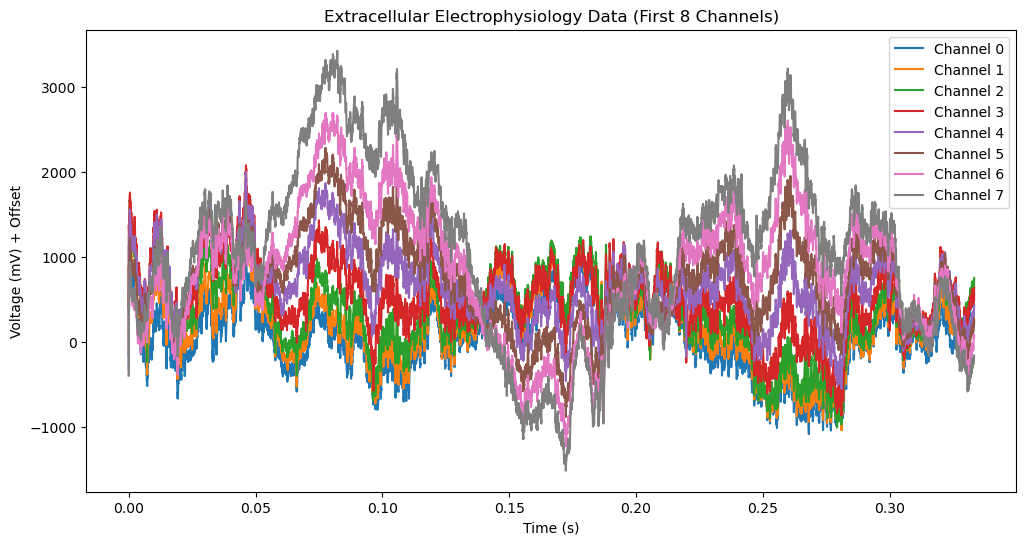

In [4]:
# Load a subset of the time series data
start = 0
end = 10000  # Reduced subset size
data = nwb.acquisition["time_series"].data[start:end, :]
rate = nwb.acquisition["time_series"].rate

# Create a time vector
time = np.arange(start, end) / rate

# Plot the data from the first 8 channels
plt.figure(figsize=(12, 6))
for i in range(min(8, data.shape[1])):  # Ensure we don't exceed the number of channels
    plt.plot(time, data[:, i] + i * 100, label=f"Channel {i}")  # Add offset for each channel
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV) + Offset")
plt.title("Extracellular Electrophysiology Data (First 8 Channels)")
plt.legend()
plt.show()

The plot above shows a snippet of the raw voltage data from 8 channels. Each channel's data is offset by a constant value to allow for easier visualization.

### Explore Electrode Metadata

Let's examine the electrode metadata to understand the recording locations.

In [5]:
# Access electrode metadata
electrodes = nwb.electrodes.to_dataframe()
print(electrodes.head())

       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13992...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13992...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13992...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13992...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13992...     shank1   

                  label  
id                       
0   shank1-electrode001  
1   shank1-electrode002  
2   shank1-electrode003  
3   shank1-electrode004  
4   shank1-electrode005  


The electrode metadata includes information about the x, y, and z coordinates of each electrode, as well as its location, filtering, and group.

### Visualize Electrode Locations

To visualize the electrode locations, we can create a scatter plot of the x and y coordinates, color-coded by the electrode group.

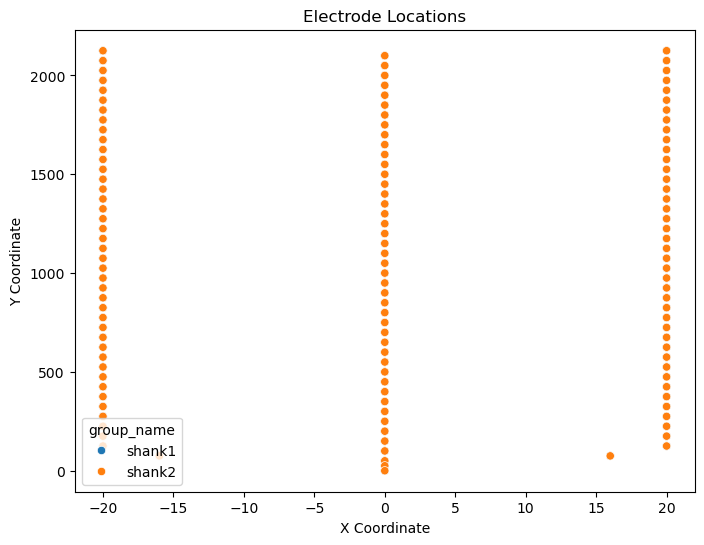

In [6]:
# Visualize electrode locations
plt.figure(figsize=(8, 6))
sns.scatterplot(x="x", y="y", hue="group_name", data=electrodes)
plt.title("Electrode Locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

This plot shows the spatial distribution of the electrodes, with different colors representing different electrode groups (shanks).

### Load and Visualize Spike Times

Now, let's load and visualize the spike times for a subset of units in the NWB file.

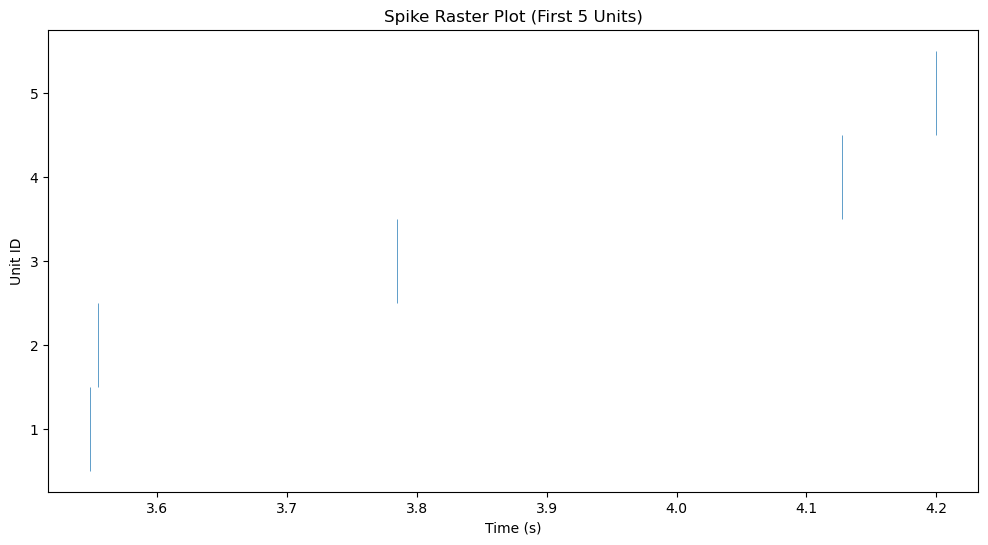

In [7]:
# Load spike times for the first 5 units
num_units = min(5, len(nwb.units.id[:]))
spike_times = []
unit_ids = []

for unit_idx in range(num_units):
    unit_id = nwb.units.id[unit_idx]
    unit_spike_times = nwb.units.spike_times[unit_idx]
    spike_times.append(unit_spike_times)
    unit_ids.append(unit_id)

# Plot spike raster
plt.figure(figsize=(12, 6))
for i, spikes in enumerate(spike_times):
    plt.vlines(spikes, i + .5, i + 1.5, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Unit ID")
plt.title("Spike Raster Plot (First 5 Units)")
plt.yticks(np.arange(1, num_units + 1), unit_ids)
plt.show()

The above raster plot shows the timing of spikes for the first 5 units in the NWB file. Each row represents a different unit, and each vertical line represents a spike. This visualization can help identify patterns in the spiking activity of different neurons.

### Summarize Findings and Future Directions

In this notebook, we have demonstrated how to load and explore data from Dandiset 001375. We have shown how to:
- Load the Dandiset metadata
- Access and examine the available assets (NWB files)
- Load and visualize data from an example NWB file, including time series data, electrode locations, and spike times.

Possible future directions for analysis include:
- Further exploration of the neural activity during different trials or behavioral states
- Analysis of the relationships between different units or brain regions
- Comparison of neural activity between different subjects or experimental conditions

This notebook provides a starting point for exploring the rich dataset contained in Dandiset 001375. By using the tools and techniques demonstrated here, researchers can gain new insights into the neural mechanisms underlying septal GABA disruption and its effects on hippocampal and neocortical activity.